## Classes for Data Science: a linear regression example

In [133]:
# generate data
babies = range(10)
months = np.arange(13)
data = [(month, np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]

In [134]:
X_pre = np.array(month_data)
X_pre = np.c_[np.ones(X_pre.shape[0]), X_pre] # little trick to add vector of 1's
y_pre = np.array(weight_data)
X_pre

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  5.],
       [ 1.,

In [135]:
X = np.array(month_data)
print(X)
X_0 = np.ones([X.shape[0], 1])
X_1 = X[:, np.newaxis]
print(X_0)
print(X_1)
X = np.concatenate((X_0, X_1), axis=1)
# X = np.vstack([, ]) # little trick to add vector of 1's
y = np.array(weight_data)
X

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  5.],
       [ 1.,

In [136]:
np.array_equal(X, X_pre)

True

In [137]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inv_xtx, xty)

In [138]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 94.15905027756037 | slope: 25.109830982010152


Text(0, 0.5, 'Weight (?)')

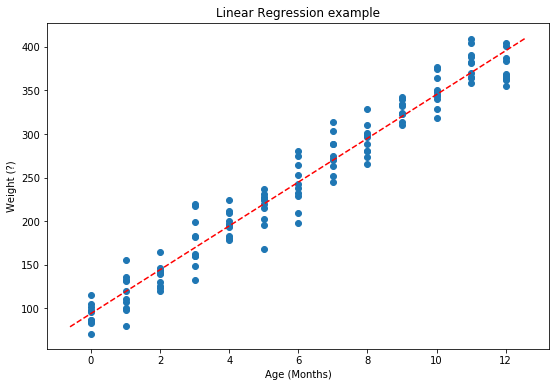

In [139]:
## here we draw a graph of the linear estimator
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(9, 6))
axes.scatter(month_data, weight_data)
x_vals = np.array(axes.get_xlim())
y_vals = params[0] + params[1] * x_vals
axes.plot(x_vals, y_vals, 'r--')
plt.title('Linear Regression example')
plt.xlabel('Age (Months)')
plt.ylabel('Weight (?)')

In [140]:
class Regressor:
    
    def fit():
        print("Regressor.fit() - override me")
        
    def predict():
        print("Regressor.predict() - override me")

class LinearRegressor(Regressor):
    
    def __init__(self):
        self.coef = None
        self.slope = None

    
    def fit(self, X, y):
        """
        Fit model coefficients.

        Arguments:
        X: 1D or 2D numpy array 
        y: 1D numpy array
        """     
        # check if X is 1D or 2D array
        X_0 = np.ones([X.shape[0], 1])
        if X.ndim == 1:
            X_1 = X[:, np.newaxis]
        X = np.concatenate((X_0, X_1), axis=1)
        # X = np.c_[np.ones(X.shape[0]), X]     
        # closed form solution
        xTx = np.dot(X.T, X)
        inverse_xTx = np.linalg.inv(xTx)
        xTy = np.dot(X.T, y)
        coef = np.dot(inverse_xTx, xTy)       
        # set attributes
        self.intercept = coef[0]
        self.slope = coef[1]

            
    def predict(self, X):
        """
        Output model prediction.

        Arguments:
        X: 1D or 2D numpy array 
        """       
        # check if X is 1D or 2D array
        if len(X.shape) == 1:
            X = X.reshape(-1,1) 
        return self.intercept + np.dot(X, self.slope)
    

In [141]:
regressor = LinearRegressor()
regressor.fit(np.array(month_data), np.array(weight_data))
print('intercept: {} | slope: {}'.format(regressor.intercept, regressor.slope))
regressor.predict(np.arange(4))

intercept: 94.15905027756037 | slope: 25.109830982010152


array([[ 94.15905028],
       [119.26888126],
       [144.37871224],
       [169.48854322]])